# Estadística

**Nota:** Los siguientes ejercicios están basados en las notas de clase disponibles en: https://github.com/ITAM-DS/Propedeutico/tree/master/R/clases/3_estadistica.

## Ejercicio en las notas 1:
Calcular el caso de $P(-1<Z<0)$  = P(0<Z<1) <br>
**Nota:** $X\sim N\left(0,1\right)$

In [98]:
media = 0
desv_est <- 1

In [99]:
1-pnorm(-1,media,desv_est)-pnorm(0,media,desv_est, lower.tail = F)

[1] 0.3413447

In [100]:
# comprobar la simetría:
1-pnorm(0,media,desv_est)-pnorm(1,media,desv_est, lower.tail = F)

[1] 0.3413447

# Ejercicio en las notas 2:
Calcular este caso **(de tres dados)** utilizando set.seed(2000), sample, ggplot2.
"Tomamos ahora tres dados y lanzamos los tres juntos $50$ ocasiones. Sumamos los números de las tres caras que aparecen en cada lanzamiento y realizamos un histograma con los resultados."

In [ ]:
install.packages('prob')

In [5]:
library(prob)
library(ggplot2)

In [ ]:
S_1a <- rolldie(3, makespace = TRUE) # el espacio muestral de lanzar 3 dados
S_1a <- addrv(S_1a, FUN=sum, invar= c('X1', 'X2','X3'), name= 'sum_caras') # creamos la suma de las caras
proba <- marginal(S_1a, vars = "sum_caras")
prob <- as.matrix(proba$probs)

In [42]:
set.seed(2000)
n_sample<-50
suma<-3:18
tres_dados<-sample(suma,n_sample,prob=prob,replace=T)
gf<-ggplot(data.frame(valores=tres_dados),aes(x=tres_dados))

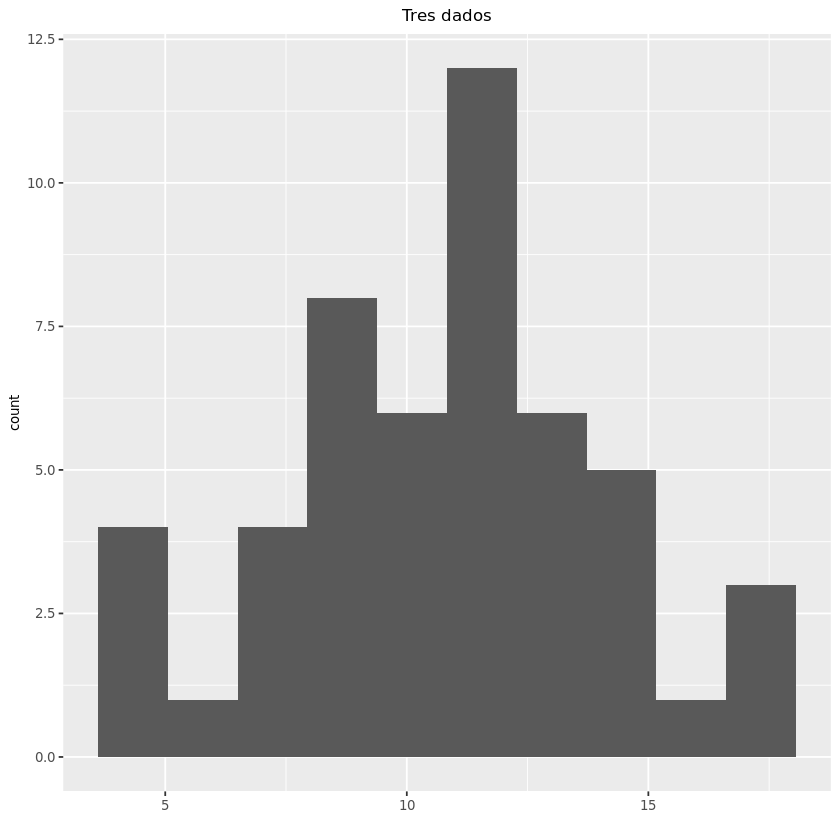

In [43]:
gf + geom_histogram(bins = 10)+
ggtitle('Tres dados') +
theme(plot.title = element_text(size=10, hjust = 0.5),
      axis.text=element_text(size=8),
      axis.title=element_text(size=8)) +
xlab('')

# Ejercicio en las notas 3:
Calcular el caso anterior pero para el promedio de la suma de los tres dados

In [44]:
promedio <- (3:18)/3
tres_dados<-sample(promedio,n_sample,prob=prob,replace=T)
gff<-ggplot(data.frame(valores=tres_dados),aes(x=tres_dados))

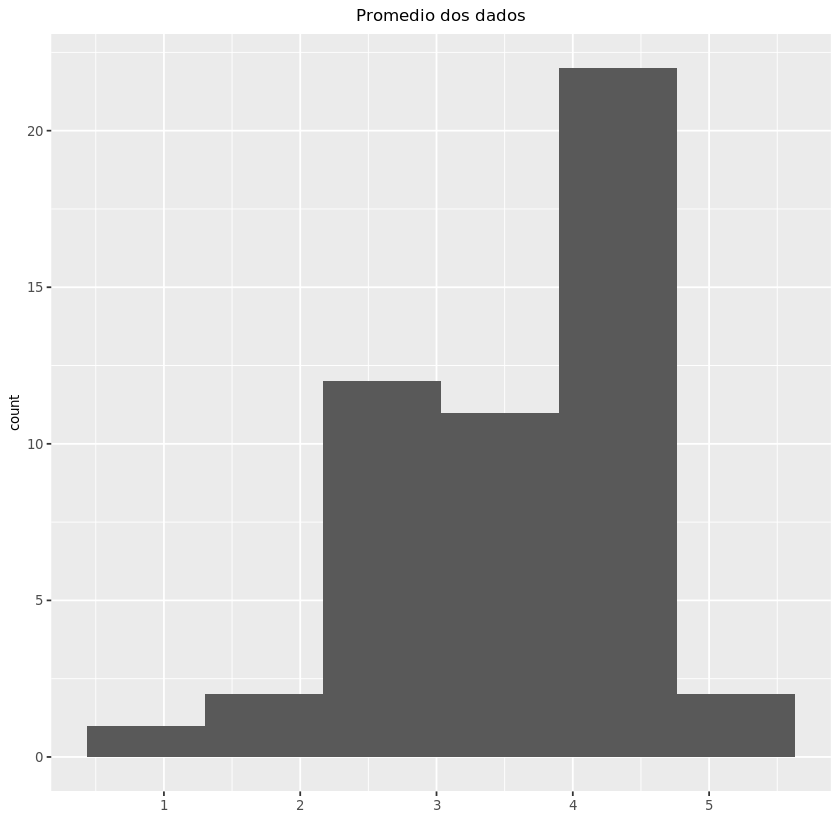

In [45]:
gf + geom_histogram(bins = 6)+
ggtitle('Promedio dos dados') +
theme(plot.title = element_text(size=10, hjust = 0.5),
      axis.text=element_text(size=8),
      axis.title=element_text(size=8)) +
xlab('')

## Ejercicio 2

Supóngase que el tiempo (en minutos) que una persona espera el Metrobús los días de semana sigue una distribución uniforme dada por, 
$$
f(x) = \begin{cases} \frac{1}{12} \:; \text{si } 0 \leq x \leq 12,\\ 0 \:; \text{en otro caso} \end{cases}
$$

A. ¿Cuál es la probabilidad que una persona espere menos de $6$ minutos?.

In [60]:
# Esta es una distribución uniforme, con extremo inferior a = 0, y superior b=12
a = 0
b = 12
prob_un = 1/b
p_esp_6 = 6*prob_un
p_esp_6

[1] 0.5

B. ¿Su tiempo medio de espera? ¿su desviación estándar?

In [65]:
# El valor esperado de una distribución uniforme es (b+a)/2
ve = (b+a)/2
ve

[1] 6

In [64]:
# La varianza es (b-a)^2/12
var = (b-a)^2/12
des_est = sqrt(var)
des_est

[1] 3.464102

## Ejercicio 2
Considérese lanzamientos de una moneda no cargada. Sea $X$ la variable aleatoria que cuenta el número de águilas en $10$ lanzamientos. Calcular en R la probabilidad $P(X \geq 3)$ con la función pbinom y dbinom, el número medio de águilas y su desviación estándar.

Calculamos $f(x)=\left(\begin{array}{c}
n\\
x
\end{array}\right)p^{x}(a-p)^{x}$, restando $1 - [f(0)+f(1)+f(2)]$.

In [79]:
# el valor esperado de una binomial utilizando dbinom (probs separadas)
p = 0.5
n = 10
prob_0 = dbinom(0, size=n,p)
prob_1 = dbinom(1, size=n,p)
prob_2 = dbinom(2, size=n,p)

prob_3mas = 1- (prob_0+prob_1+prob_2)
prob_3mas

[1] 0.9453125

In [80]:
# Ahora se calcula utilizando pbinom en una sola línea (ya que puede calcular directamente la proba de que x sea 2 o menos)
prob_2menos = pbinom(2, size=n, 0.5)

prob_3ma1 = 1 - prob_2menos
prob_3ma1

[1] 0.9453125

In [81]:
# la media de una binomial es n*p
ve = n*p
ve

[1] 5

In [82]:
# la varianza de una binomial es np*(1-p)
var = n*p*(1-p)
des_est = sqrt(var)
des_est


[1] 1.581139

## Ejercicio 3
Considérese una población de votantes en la ciudad de México. Se reporta que la proporción de votantes que favorecen al candidato del partido Naranja es igual a $0.40$. Dada una muestra aleatoria de $200$ votantes, ¿cuál es la probabilidad de que más de la mitad de ellos tengan intención de voto por el candidato naranja? Usar:

A. pbinom

In [86]:
p_nar = 0.4
n_vot = 200
# se calcula como 1-p(mitad de votantes), en una linea con pbinom
prob_g_n = 1-pbinom(0.5*n_vot, size=n, p_nar)
prob_g_n

[1] 0

B. El teorema del límite central y pnorm considerando lo que se conoce como corrección por continuidad: si $B$ es variable aleatoria binomial con $\mu$ y $\sigma$ entonces $P(B=k) = P(k-0.5<X<k+0.5)$ con $X$ variable aleatoria normal $N(\mu,\sigma)$ y $k$ un número entero no negativo.

Dado lo anterior, es posible calcular la misma probabilidad utilizando una normal con la misma medio y desviación estándar que la binomial. A continuación se calculan

In [87]:
# la media de una binomial es n*p
media = n_vot*p_nar
media

[1] 80

In [88]:
# la varianza de una binomial es np*(1-p)
vari = n_vot*p_nar*(1-p_nar)
dest = sqrt(var)
dest

[1] 1.581139

Ahora se utilizan estos parámetros en una distribución normal y se ajusta para que se calcule la probabilidad sea calculada para hallar más de la mitad de los votantes. Entonces estamos tomando 1 - prob(sacar la mitad o menos).

In [92]:
prob_tlc = 1-pnorm(0.5*n_vot+ 0.5, media, dest)
prob_tlc

[1] 0

## Ejercicio 4
Supongamos que el ingreso anual de un imigrante mexicano en los EUA se distribuye de forma normal con una media de $\$30,000$ y una desviación estándar de $\$10,000$ dólares. ¿Cuál es la probabilidad de que un inmigrante mexicano gane menos de $\$20,000$ dólares anuales? ¿Cuál es la probabilidad de que su ingreso sea mayor a los $\$50,000$ dólares anuales? (usar R).

Para poder usar la función de la distribución normal estándar $Z(0,1)$, se debe hacer una estándarización inicial y luego procedemos a calcular el área de esta transformación en la cola izda.

a) Probabilidad de que gane menos de $20000 dólares

In [93]:
media_inm = 30000
desv_inm = 10000
ext_izd = (20000-media_inm)/desv_inm

prob_menos_20k = pnorm(ext_izd)

In [94]:
prob_menos_20k

[1] 0.1586553

Esto debería ser igual a utilizar pnorm asignando la media y varianza reales, y R lo estandariza? 

In [96]:
prob_menos_20k = pnorm(20000,media_inm, desv_inm)
prob_menos_20k

[1] 0.1586553

b) Probabilidad de que gane más de $50000

Para este caso estámos calculando 1 - p(gane 50k o menos) para usar la cola izquierda

In [97]:
prob_mas_50k = 1- pnorm(50000,media_inm, desv_inm)
prob_mas_50k

[1] 0.02275013